### ***Neural Network Stock Movement Prediction***

This notebook demonstrates the usage of our neural network implementation from `mlp_classifier.py`. The module implements a binary classifier to predict significant stock price movements using scikit-learn's MLPClassifier.

### ***Prerequisites***

Before running this notebook:
1. Ensure Ben's `pca_baseline.py` has been executed successfully
2. Verify `data/pca_features.parquet` exists
3. Check that all required packages are installed

### ***Implementation Overview***

The `mlp_classifier.py` module provides:

1. Data Pipeline:
   - Loads PCA-transformed features from `pca_features.parquet`
   - Converts to binary classification (1 for >1.5% increase, 0 otherwise)
   - Uses chronological train-test split

2. Model Architecture:
   - Three hidden layers: 128 → 64 → 32 neurons
   - ReLU activation functions
   - Adam optimizer with adaptive learning rate
   - Early stopping for regularization

3. Output:
   - Saves metrics to `data/mlp_classifier_output/metrics.csv`
   - Saves detailed report to `data/mlp_classifier_output/classification_report.csv`
   - Returns metrics dictionary and classification report for pipeline integration

In [25]:
# Standard imports for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import our MLP classifier module
from mlp_classifier import train_and_evaluate

# Set plotting style
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [26]:
# Check prerequisites
import os
from config import OUTPUT_DIR

# Check if PCA features file exists
pca_file = os.path.join(OUTPUT_DIR, "pca_features.parquet")
if not os.path.exists(pca_file):
    raise FileNotFoundError(
        "\nERROR: PCA features file not found!"
        "\nPlease run pca_baseline.py first to generate:"
        f"\n{pca_file}"
    )
else:
    print("✓ PCA features file found")
    
# Create output directory if needed
output_dir = os.path.join(OUTPUT_DIR, "mlp_classifier_output")
os.makedirs(output_dir, exist_ok=True)
print("✓ Output directory ready:", output_dir)

✓ PCA features file found
✓ Output directory ready: g:\School\Data Mining Techniques\CS6220_final_project\data\mlp_classifier_output


### ***Model Training and Evaluation***

Let's use the `train_and_evaluate()` function from our module to:
1. Load the PCA-transformed features
2. Train the neural network
3. Evaluate performance
4. Save results to the output directory

### ***Model Setup***

We'll create our neural network using scikit-learn's MLPClassifier. The architecture matches our proposal requirements:
- Three hidden layers for deep feature extraction
- ReLU activation for non-linearity
- Dropout and early stopping for regularization
- Adam optimizer for efficient training

In [27]:
# Train and evaluate the model
print("Training and evaluating the MLP classifier...")
metrics, report, model = train_and_evaluate()

print("\nPerformance Metrics:")
print("-" * 50)
for metric, value in metrics.items():
    print(f"{metric:>10}: {value:.4f}")

print("\nDetailed Classification Report:")
print("-" * 50)
print(report)

Training and evaluating the MLP classifier...
Loading and preparing data...

Dataset Overview:
--------------------------------------------------
Shape: (567930, 9)
Number of features: 8
Number of samples: 567930
Time period coverage: 1135.0 trading days

Class distribution:
  Big negative moves (<-1.5%): 15.7%
  Small/No moves (-1.5% to 1.5%): 67.1%
  Big positive moves (>1.5%): 17.1%

Training set shape: (454344, 8)
Test set shape: (113586, 8)

Creating and training MLP model...
Iteration 1, loss = 0.39507995
Validation score: 0.830723
Iteration 2, loss = 0.39055119
Validation score: 0.830712
Iteration 3, loss = 0.38900549
Validation score: 0.831384
Iteration 4, loss = 0.38826108
Validation score: 0.831879
Iteration 5, loss = 0.38758888
Validation score: 0.831659
Iteration 6, loss = 0.38713337
Validation score: 0.832440
Iteration 7, loss = 0.38674455
Validation score: 0.832495
Iteration 8, loss = 0.38641630
Validation score: 0.831912
Iteration 9, loss = 0.38619814
Validation score: 0

### ***Model Performance Visualization***

Let's visualize the model's performance using:
1. Loss curve during training
2. Validation scores progression
3. Learning curves

These visualizations help us understand how the model learned and where it might be improved.

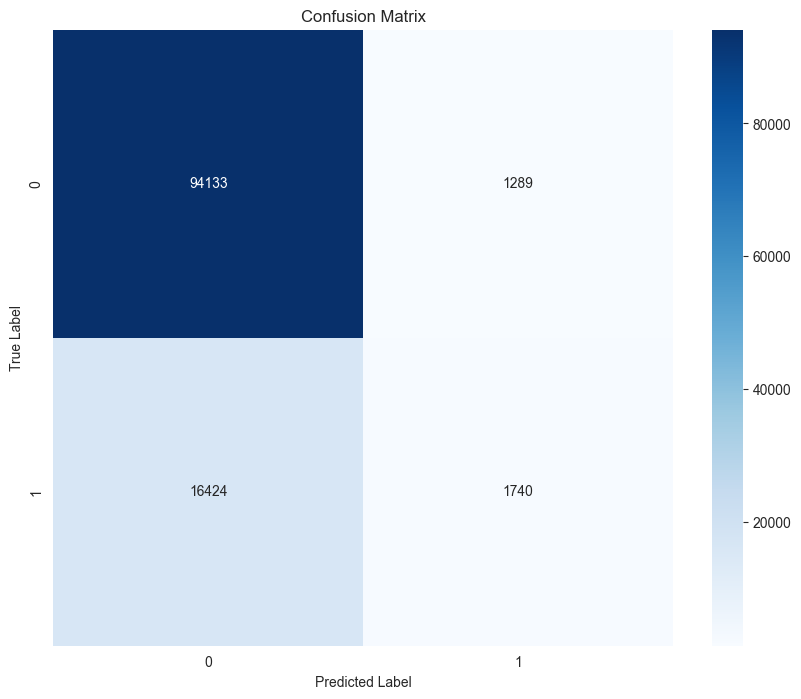

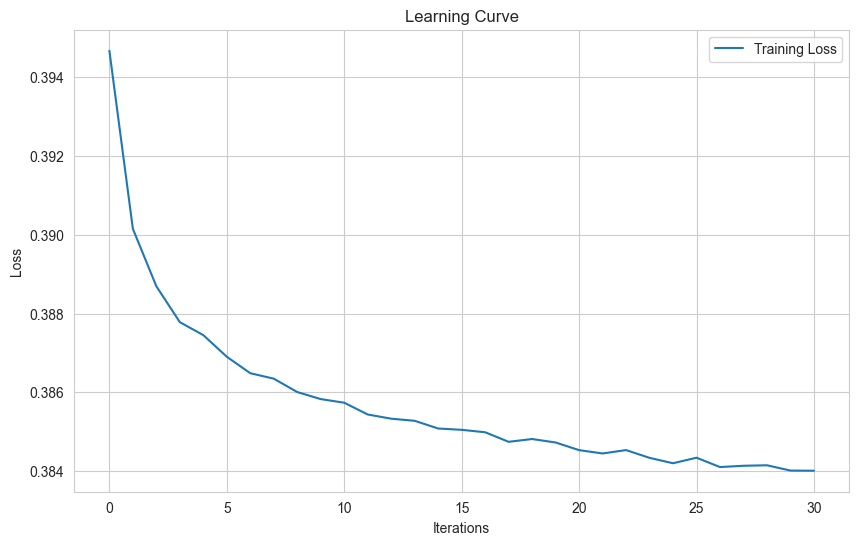

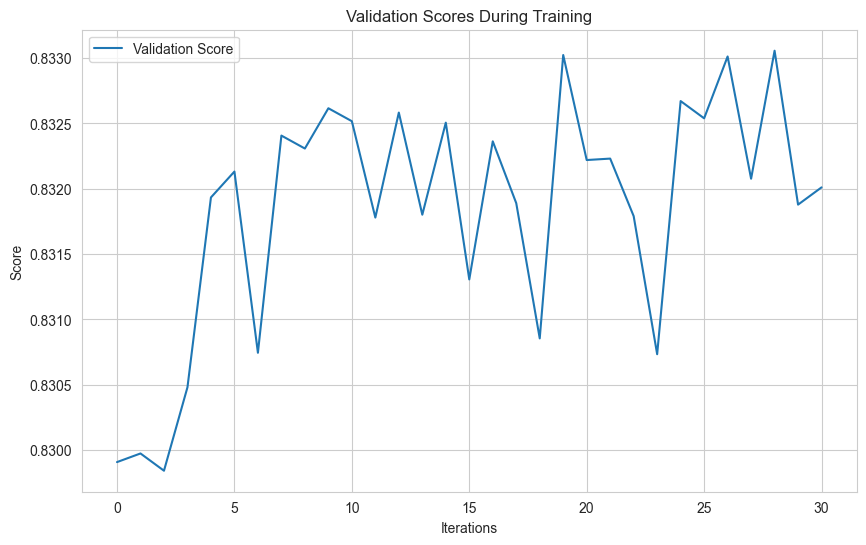

In [30]:
# Import confusion_matrix if not already imported
from sklearn.metrics import confusion_matrix

# Create confusion matrix
y_test_binary = (y_test == 1)
y_pred_binary = (y_pred == 1)
cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot loss curve if available
if hasattr(model, 'loss_curve_'):
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_, label='Training Loss')
    plt.title('Learning Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display validation scores if available
if hasattr(model, 'validation_scores_'):
    plt.figure(figsize=(10, 6))
    plt.plot(model.validation_scores_, label='Validation Score')
    plt.title('Validation Scores During Training')
    plt.xlabel('Iterations')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

### ***Using the mlp_classifier Module***

To use this notebook as part of the main pipeline, you can import and use `train_and_evaluate()` from `mlp_classifier.py`:

```python
from mlp_classifier import train_and_evaluate

# Get metrics and model
metrics, report, model = train_and_evaluate()
```

This follows our project structure where:
1. Heavy lifting is done in mlp_classifier.py
2. Results are saved to data/mlp_classifier_output/
3. Notebook provides interactive exploration and visualization
4. Main pipeline can easily import and use our module

In [29]:
# Example of using mlp_classifier module
from mlp_classifier import train_and_evaluate

# Run training and evaluation
metrics, report, model = train_and_evaluate()

print("Results from mlp_classifier.py:")
print("-" * 50)
print("\nMetrics:")
for k, v in metrics.items():
    print(f"{k:>10}: {v:.4f}")

print("\nClassification Report:")
print(report)

Loading and preparing data...

Dataset Overview:
--------------------------------------------------
Shape: (567930, 9)
Number of features: 8
Number of samples: 567930
Time period coverage: 1135.0 trading days

Class distribution:
  Big negative moves (<-1.5%): 15.7%
  Small/No moves (-1.5% to 1.5%): 67.1%
  Big positive moves (>1.5%): 17.1%

Training set shape: (454344, 8)
Test set shape: (113586, 8)

Creating and training MLP model...
Iteration 1, loss = 0.39467025
Validation score: 0.829909
Iteration 2, loss = 0.39015034
Validation score: 0.829975
Iteration 3, loss = 0.38869244
Validation score: 0.829843
Iteration 4, loss = 0.38778105
Validation score: 0.830481
Iteration 5, loss = 0.38745163
Validation score: 0.831934
Iteration 6, loss = 0.38690320
Validation score: 0.832132
Iteration 7, loss = 0.38648472
Validation score: 0.830745
Iteration 8, loss = 0.38634692
Validation score: 0.832407
Iteration 9, loss = 0.38600671
Validation score: 0.832308
Iteration 10, loss = 0.38582833
Valida